# Logistic Regression 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as clrs

import sklearn.linear_model
from sklearn.datasets import make_classification

### Dataset

Generating random generated data:

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)

X.shape, y.shape, X[:, 0].shape, X[:, 1].shape

((100, 2), (100,), (100,), (100,))

Displaying dataset

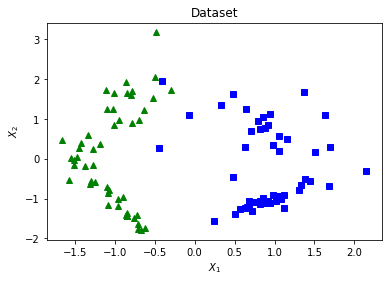

In [3]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")

plt.title('Dataset')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

# Logistic Regression from scratch

### Sigmoid or Logistic function

The Sigmoid Function squishes all its inputs, values on the x-axis, between 0 and 1 as we can see on the y-axis in the graph below.

As z increases towards positive infinity the output gets closer to 1.

As z decreases towards negative infinity the output gets closer to 0.


There are lots of continuous function that outputs values between 0 and 1. Why did we choose the Logistic Function? 

The sigmoid function fits very naturally given our set of assumptions.

In [4]:
sigmoid = lambda z: 1.0 / (1 + np.exp(-z))

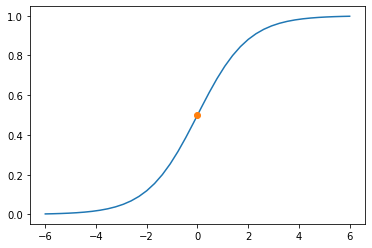

In [5]:
x1 = np.linspace(-6.0, 6.0, num=40)
y1 = sigmoid(x1)

plt.plot(x1, y1)
plt.plot([0.0], [0.5], 'o')
plt.show()

### Hypothesis
For Linear Regression, we had the hypothesis $\hat{y} = w.X + b$, whose output range was the set of all Real Numbers.

Now, for Logistic Regression our hypothesis is $\hat{y} = sigmoid(w.X + b)$, whose output range is between 0.

$h(x) = {1 \over 1 + e^{-sigmoid(w.X + b)}}$

### Loss/Cost function

For a binary classification problem, we need to be able to output the probability of y being 1, in other words: the probability of $y = 1$ given $X$, parameterized by $w$ and $b$ is $\hat{y}$ (hypothesis):
$$\hat{y} = P(y = 1 | X; w, b) = {1 \over 1 + e^{-w_1}}$$$

then we can determine the probability of y being 0 (or vice versa), in other words: the probability of $y = 0$ given $X$, parameterized by w and b should be $1 - \hat{y}$:
$$1 - \hat{y} = P(y = 0 | X; w, b) = 1 - {1 \over 1 + e^{-w_0}} = {1 + e^{-w_0} - 1 \over 1 + e^{-w_0}} = {e^{-w_0} \over 1 + e^{-w_0}}$$

#### Binary Coss-Entropy Loss or the Log Loss function:

In [6]:
loss = lambda y, y_hat: -np.mean(y * (np.log(y_hat)) - (1 - y) * np.log(1 - y_hat))

### Gradient Descent
We need to do is use the Gradient Descent Algorithm to find the optimal values of our parameters.

In [7]:
def gradients(X, y, y_hat):
    
    # X     --> Input.
    # y     --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w     --> weights (parameter).
    # dw    --> is the partial derivative of the Loss function with respect to w.
    # b     --> bias (parameter).
    # db    --> is the partial derivative of the Loss function with respect to b.
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1 / m) * np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1 / m) * np.sum((y_hat - y)) 
    
    return dw, db

### Train Function
The train the function includes initializing the weights and bias and the training loop with mini-batch gradient descent.
See comments(#).

In [8]:
normalization = lambda X: (X - X.mean(axis=0)) / X.std(axis=0)

In [9]:
def train(X, y, bs, epochs, lr, verbose=True):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # X.shape[0] -> number of training examples
    # X.shape[1] -> number of features 
    
    # Empty list to store losses.
    losses = []
    
    if verbose: 
        print(f"X.shape: {X.shape}")
        print(f"y.shape: {y.shape}")
    
    # Initializing weights and bias to zeros.
    w, b = np.zeros((X.shape[1], 1)), 0
    
    # Reshaping y.
    y = y.reshape(X.shape[0], 1)
    
    if verbose: 
        print(f"y.reshape(X.shape[0], 1): {y.shape}\n")
        
    # Normalizing the inputs
    x = normalization(X)

    # Training loop
    for epoch in range(epochs):
        
        for i in range((X.shape[0] - 1) // bs + 1):
            
            # Defining batches. SGD
            start_i = i * bs
            end_i   = start_i + bs
                
            x_batch = X[start_i: end_i]
            y_batch = y[start_i: end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(x_batch, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(x_batch, y_batch, y_hat)
            
            # Updating the parameters.
            w -= lr * dw
            b -= lr * db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    print(f"W: {w.flatten()}")
    print(f"b: {b}")
    # returning weights, bias and losses(List).
    return w, b, losses

In [10]:
# Training 
w_opt, b_opt, losses = train(X, y, bs=10, epochs=10000, lr=0.1)

X.shape: (100, 2)
y.shape: (100,)
y.reshape(X.shape[0], 1): (100, 1)

W: [13.41465497 -0.38798991]
b: 5.465720010536769


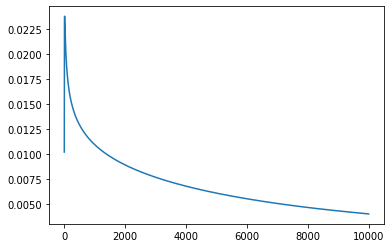

In [11]:
plt.plot(losses)

In [12]:
def predict(X):
    
    # X --> Input
    # Normalizing the inputs
    x = normalization(X)
    
    # Calculating presictions/y_hat
    preds = sigmoid(np.dot(X, w_opt) + b_opt)

    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5  --> round up to 1

    pred_class = list(map(lambda pred: 1 if pred >= 0.5 else 0, preds))
    
    return np.array(pred_class)

In [13]:
accuracy = lambda y, y_hat: np.sum(y == y_hat) / y.shape[0] 

y_hat = predict(X)
accuracy(y, y_hat)

0.97

### Standard form
$Ax + By + C = 0 \;\;  \Leftrightarrow \;\; Ax + By = C$

### Slope intersection form (forme d'intersection de pente)
$y = mx + b$

- $m$ is equal to the slope of the line
- $b$ is the value of $y$ when $x = 0$, which makes it the intercept. 

### Slope intersection form to standard form

$y = mx + b$

$y - mx = (mx - mx) + b$

$y - mx = b$

$y - mx - b = (b - b)$

$y - mx - b = 0$

$- mx + y - b = 0$

#### Reorganization

$- mx + y - b = 0$

$Ax + By + C = 0 \;\;  \Leftrightarrow \;\; A/Bx + y + C/B = 0$ 

The fraction ${-A \over B}$ represents $m$

The fraction ${-C \over B}$ represents $b$

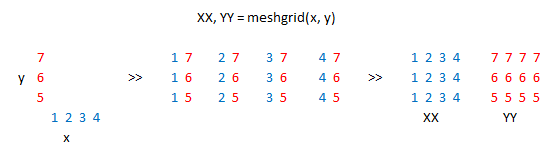

In [14]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias

    # w[1] * y = w[0] * x + b 
    # y = (w[0] * x) / w[1] + b / w[1]
    # y = mx + c
    # m = -w[0] / w[1]
    # c = -b / w[1] 
    
    # Point 1
    x1 = [min(X[:,0]), max(X[:,0])]
    
    m = -w[0] / w[1]
    c = -b / w[1]
    
    # Point 2
    x2 = m * x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

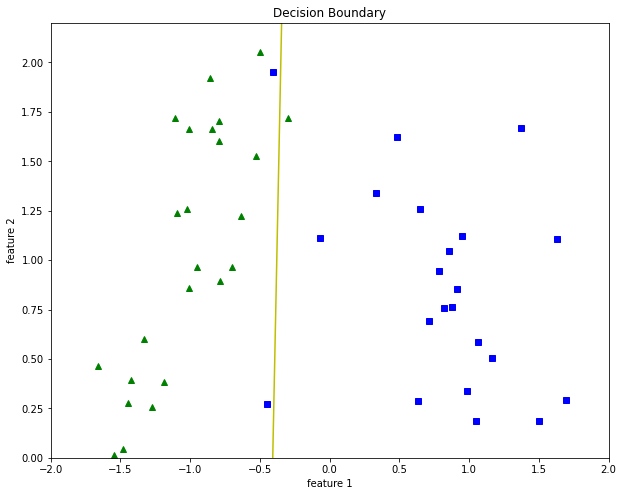

In [15]:
plot_decision_boundary(X, w_opt, b_opt)

# Logistic Regression with Sklearn

clf.coef_.T.shape: (2, 1)
clf.coef_.shape: (1, 2)


Text(0.5, 1.0, 'Scatter Plot with Decision Boundary for the Training Set')

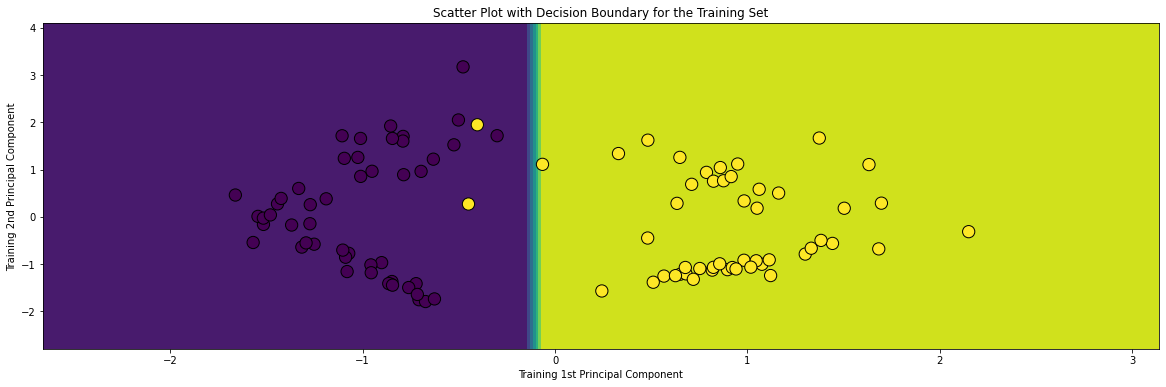

In [16]:
clf = sklearn.linear_model.LogisticRegression()

# Fit the model
clf.fit(X, y)

# Retrieve the model parameters.
b      = clf.intercept_[0]
w1, w2 = clf.coef_.T

print(f"clf.coef_.T.shape: {clf.coef_.T.shape}\n" + \
      f"clf.coef_.shape: {clf.coef_.shape}")

# Calculate the intercept and gradient of the decision boundary.
c = -b / w2
m = -w1 / w2

# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = clf.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

plt.figure(figsize = (20, 6))
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolor='k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')